# Clean And Analyze Employee Exit Surveys

### About:
Clean And Analyze Employee Exit Surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

### Goal
Answer the following questions:
 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns from the dete_survey.csv:
 - ID: An id used to identify the participant of the survey
 - SeparationType: The reason why the person's employment ended
 - Cease Date: The year or month the person's employment ended
 - DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns from the tafe_survey.csv:
 - Record ID: An id used to identify the participant of the survey
 - Reason for ceasing employment: The reason why the person's employment ended
 - LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
 
Datasets links:

**Employee Exit Survey - DETE**

https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

**TAFE employee exit survey**

https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

In [1]:
# import required libs:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# Explore datasets

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
print(dete_survey.head(5))

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

#### Main observations DEFE dataset:

 - A lot of columns contains multiples of missing data, that should be examined additionally
 - Columns names are required to be unified
 - Dataset contain many columns that are not needed to complete our analysis.

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### Main observations DEFE dataset:

 - A lot of columns contains multiples of missing data, that should be examined additionally
 - Columns names are required to be unified
 - Missing values can be unified (replace '-' for NaN)
 - Dataset contain many columns that are not needed to complete our analysis.

### Clean datesets

In [8]:
# Unify non-stated data
dete_survey = pd.read_csv('dete_survey.csv', na_values=['-', 'Not Stated'])
tafe_survey = pd.read_csv('tafe_survey.csv', na_values=['-', 'Not Stated'])

In [9]:
# drop unnecessary columns
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [10]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
# drop unnecessary columns
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

### List of columns for analysis

|dete_survey|tafe_survey|Definition|
|----|--|
|ID|Record ID|An id used to identify the participant of the survey
|SeparationType|Reason for ceasing employment| The reason why the participant's employment ended|
|Cease Date|CESSATION YEAR|The year or month the participant's employment ended|
|DETE Start Date| |The year the participant began employment with the DETE|
| |LengthofServiceOverall.Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|
|Age|CurrentAge.Current Age|The age of the participant|
|Gender|Gender.What is your Gender?|The gender of the participant|

#### Rename columns in datasets to standardize their names for further combine

In [12]:
# rename columns in dete_survey_updated
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ', '_')

In [13]:
dete_survey

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,False,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [14]:
# rename columns in dete_survey_updated
new_names = {'Record ID': 'id',
             'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separationtype',
             'Gender. What is your Gender?': 'gender',
             'CurrentAge. Current Age': 'age',
             'Employment Type. Employment Type': 'employment_status',
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [15]:
tafe_survey = tafe_survey.rename(columns=new_names)

In [16]:
tafe_survey

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,...,NaN,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Other,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,Maternity/Family,...,NaN,NaN,Other,NaN,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Other,NaN,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Other,NaN,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,NaN,NaN,NaN,NaN,...,NaN,NaN,Other,NaN,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


#### Remove columns that are not required for the analysis

In [17]:
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

#### During the analysis we are intresting only in survey respondents who have a Resignation separation type.

Remove other rows

In [19]:
dete_resignations = dete_survey.loc[dete_survey['separationtype'].str.contains('Resignation'),:].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [20]:
tafe_resignations = tafe_survey.loc[tafe_survey['separationtype'].str.contains('Resignation', na=False),:].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

#### Check the years in each dataframe for logical inconsistencies

Clean dete_resignations dataset

In [21]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:]

In [23]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.strip().astype('float')

In [24]:
dete_resignations['cease_date'].value_counts() 

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Check if there are inconsisntances between cease date and start dete date

In [25]:
dete_resignations['dete_start_date'].value_counts() 

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [26]:
inc_dates = dete_resignations.loc[dete_resignations['cease_date'] < dete_resignations['dete_start_date'],:]

In [27]:
inc_dates

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


In [28]:
inc_dates

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


Clean rows with empty cease date and start date

In [29]:
dete_resignations = dete_resignations.loc[dete_resignations['cease_date'].notnull(),:]
dete_resignations = dete_resignations.loc[dete_resignations['dete_start_date'].notnull(),:]

In [30]:
dete_resignations['cease_date'].unique()

array([2012., 2013., 2010., 2014., 2006.])

In [31]:
dete_resignations['dete_start_date'].unique()

array([2005., 1994., 2009., 1997., 1998., 2007., 1982., 1980., 1973.,
       1995., 2003., 2006., 2011., 1977., 1974., 1976., 1993., 2008.,
       1986., 2002., 2004., 2010., 2012., 1989., 1999., 1996., 2000.,
       1991., 1992., 2001., 1988., 1990., 1985., 1963., 2013., 1972.,
       1983., 1971., 1975.])

In [32]:
# drop rows with start date older than 2000 as irrelevant
dete_resignations = dete_resignations.loc[dete_resignations['dete_start_date'] >= 2000, :]

**Clean tafe_resigntaions dataset**

In [33]:
tafe_resignations['cease_date'].unique()

array([2010., 2009.,   nan, 2011., 2012., 2013.])

Clean rows with empty cease date

In [34]:
tafe_resignations = tafe_resignations.loc[tafe_resignations['cease_date'].notnull(),:]

In [35]:
tafe_resignations['cease_date'].unique()

array([2010., 2009., 2011., 2012., 2013.])

#### Create new column with a period of service

In [36]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [37]:
dete_resignations.pivot_table(index='cease_date', values='institute_service', aggfunc=(np.mean, pd.Series.nunique))

,mean,nunique
cease_date,,
2006.0,0.000000,1.0
2010.0,3.000000,1.0
2012.0,4.276316,12.0
2013.0,5.229167,14.0
2014.0,6.071429,8.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff789af080>]],
      dtype=object)

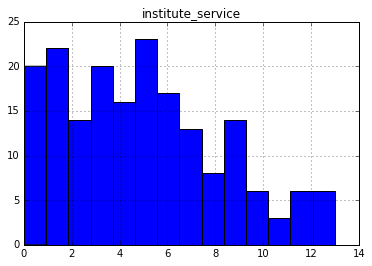

In [38]:
dete_resignations.hist('institute_service', bins=14)

#### Main examination
 
 - Major part of employees leave DEFE in 2012 and 2013
 - During first 2 years of working 42% of employees leave DETE

#### Examine contributing factors on dissatisfaction of employees

Replace Contributing Factors. Dissatisfaction and Contributing Factors. Job Dissatisfaction with True and False

In [39]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array([nan, 'Contributing Factors. Dissatisfaction '], dtype=object)

In [40]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array([nan, 'Job Dissatisfaction'], dtype=object)

In [41]:
tafe_resignations.loc[tafe_resignations['Contributing Factors. Dissatisfaction'].notnull(),'Contributing Factors. Dissatisfaction'] = True
tafe_resignations.loc[tafe_resignations['Contributing Factors. Dissatisfaction'].isnull(),'Contributing Factors. Dissatisfaction'] = False

In [42]:
tafe_resignations.loc[tafe_resignations['Contributing Factors. Job Dissatisfaction'].notnull(),'Contributing Factors. Job Dissatisfaction'] = True
tafe_resignations.loc[tafe_resignations['Contributing Factors. Job Dissatisfaction'].isnull(),'Contributing Factors. Job Dissatisfaction'] = False

In [43]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array([False,  True])

In [44]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array([False,  True])

#### Create new dissatisfied column in each dataset that will contain just the following values:

 - True: indicates a person resigned because they were dissatisfied with the job
 - False: indicates a person resigned because of a reason other than dissatisfaction with the job
 - NaN: indicates the value is missing

In [45]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [46]:
tafe_resignations['dissatisfied'].unique()

array([False,  True])

In [47]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

#### Prepare datasets to be combined

Add a column to each dataframe that will allow us to easily distinguish between the two

In [48]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [49]:
# combine the dataframes
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)

In [50]:
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                0
aboriginal                                               5
nesb                                                     6
disability                                               6
Contributing Factors. Career Move - Self-employment     13
Contributing Factors. NONE                              16
Contributing Factors. Study                             16
Contributing Factors. Travel                            16
Contributing Factors. Maternity/Family                  20
Contributing Factors. Ill Health                        21
Contributing Factors. Interpersonal Conflict            24
business_unit                                           24
Contributing Factors. Career Move - Public Sector       47
Contributing Factors. Other                             86
Contributing Factors. Career Move - Private Sector      98
classification                                         1

In [51]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 330, axis =1).copy()

In [52]:
combined_updated.notnull().sum().sort_values()

Contributing Factors. Dissatisfaction        335
Contributing Factors. Job Dissatisfaction    335
Institute                                    335
WorkArea                                     335
position                                     474
age                                          475
gender                                       475
employment_status                            476
institute_service                            476
cease_date                                   523
dissatisfied                                 523
id                                           523
institute                                    523
separationtype                               523
dtype: int64

#### Examine institute_service column

In [53]:
combined_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   47
5-6                   33
11-20                 24
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   6
12.0                   6
10.0                   6
11.0                   3
Name: institute_service, dtype: int64

Convert this column into a categories:
 - New: Less than 3 years at a company
 - Experienced: 3-6 years at a company
 - Established: 7-10 years at a company
 - Veteran: 11 or more years at a company

In [54]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')

In [55]:
combined_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
nan                   47
5-6                   33
11-20                 24
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
12.0                   6
10.0                   6
13.0                   6
11.0                   3
Name: institute_service, dtype: int64

In [56]:
new_cat = ['Less than 1 year', '0.0', '1-2','2.0', '1.0']
experienced_cat = ['3.0', '3-4','4.0','5.0','6.0','5-6']
established_cat = ['7-10','7.0','8.0','9.0','10.0']
veteran_cat = ['11-20','10.0','11.0','12.0','13.0','More than 20 years']

In [68]:
combined_updated['service_cat'] = combined_updated['institute_service']
combined_updated['service_cat'] = combined_updated['service_cat'].replace(new_cat, 'New')
combined_updated['service_cat'] = combined_updated['service_cat'].replace(experienced_cat, 'Experienced')
combined_updated['service_cat'] = combined_updated['service_cat'].replace(established_cat, 'Established')
combined_updated['service_cat'] = combined_updated['service_cat'].replace(veteran_cat, 'Veteran')

#### Fill missing values in dissatisfied column with most frequent value

In [69]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    346
True     177
Name: dissatisfied, dtype: int64

In [70]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [71]:
func = lambda x: 100*x.count()/combined_updated.shape[0]
p_table = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied', aggfunc=func)

In [76]:
p_table

,dissatisfied
service_cat,
Established,11.854685
Experienced,32.887189
New,36.902486
Veteran,9.369025
nan,8.986616


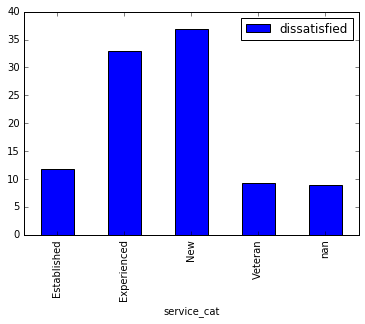

In [75]:
p_table.plot(kind='bar')

### Conclusion: New (36.90%) and Experienced (32.89%) employees are more often dissatisfied with job